# Assignment 2 EECS-3401
Name: Samin Sharif </br>
Student Number: 217871179 </br>
Date: November 9, 2023

# Framing the Problem

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A regression task – predict a value.
3. Batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
Predictions will be used to help inform student advisors of students at risks. Advisors will use the info to contact students to discuss thier academic standing and let them know of the available support.

#### Importing Libraries


In [111]:
# Importing the necessary libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Loading our dataset
Imported the adult dataset using the ucimlrepo. This includes two panda dataframes:
- X -> which includes the data features from the adult dataset
- Y -> which includes the data targets from the adult dataset

In [112]:
# Importing the adult dataset  
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

## Task 2: Overview of the Data Structure

#### First let us take a look at the adult dataset features which is the X dataframe 

Used the head(), describe(), info() and shape() methods to get a quick overview of the data structure and get a better idea about the data.

In [113]:
X.head() # Using the head method to check the first few rows of the dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [136]:
X.info() # The info method gives us specific details about 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [115]:
X.describe() # The describe method gives us numerical statistics about the columns

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [135]:
X.shape # Gives the shape of the dataset

(48842, 14)

### Task 2.1: Let us draw a histrogram of the adult dataset to help visualize the information better

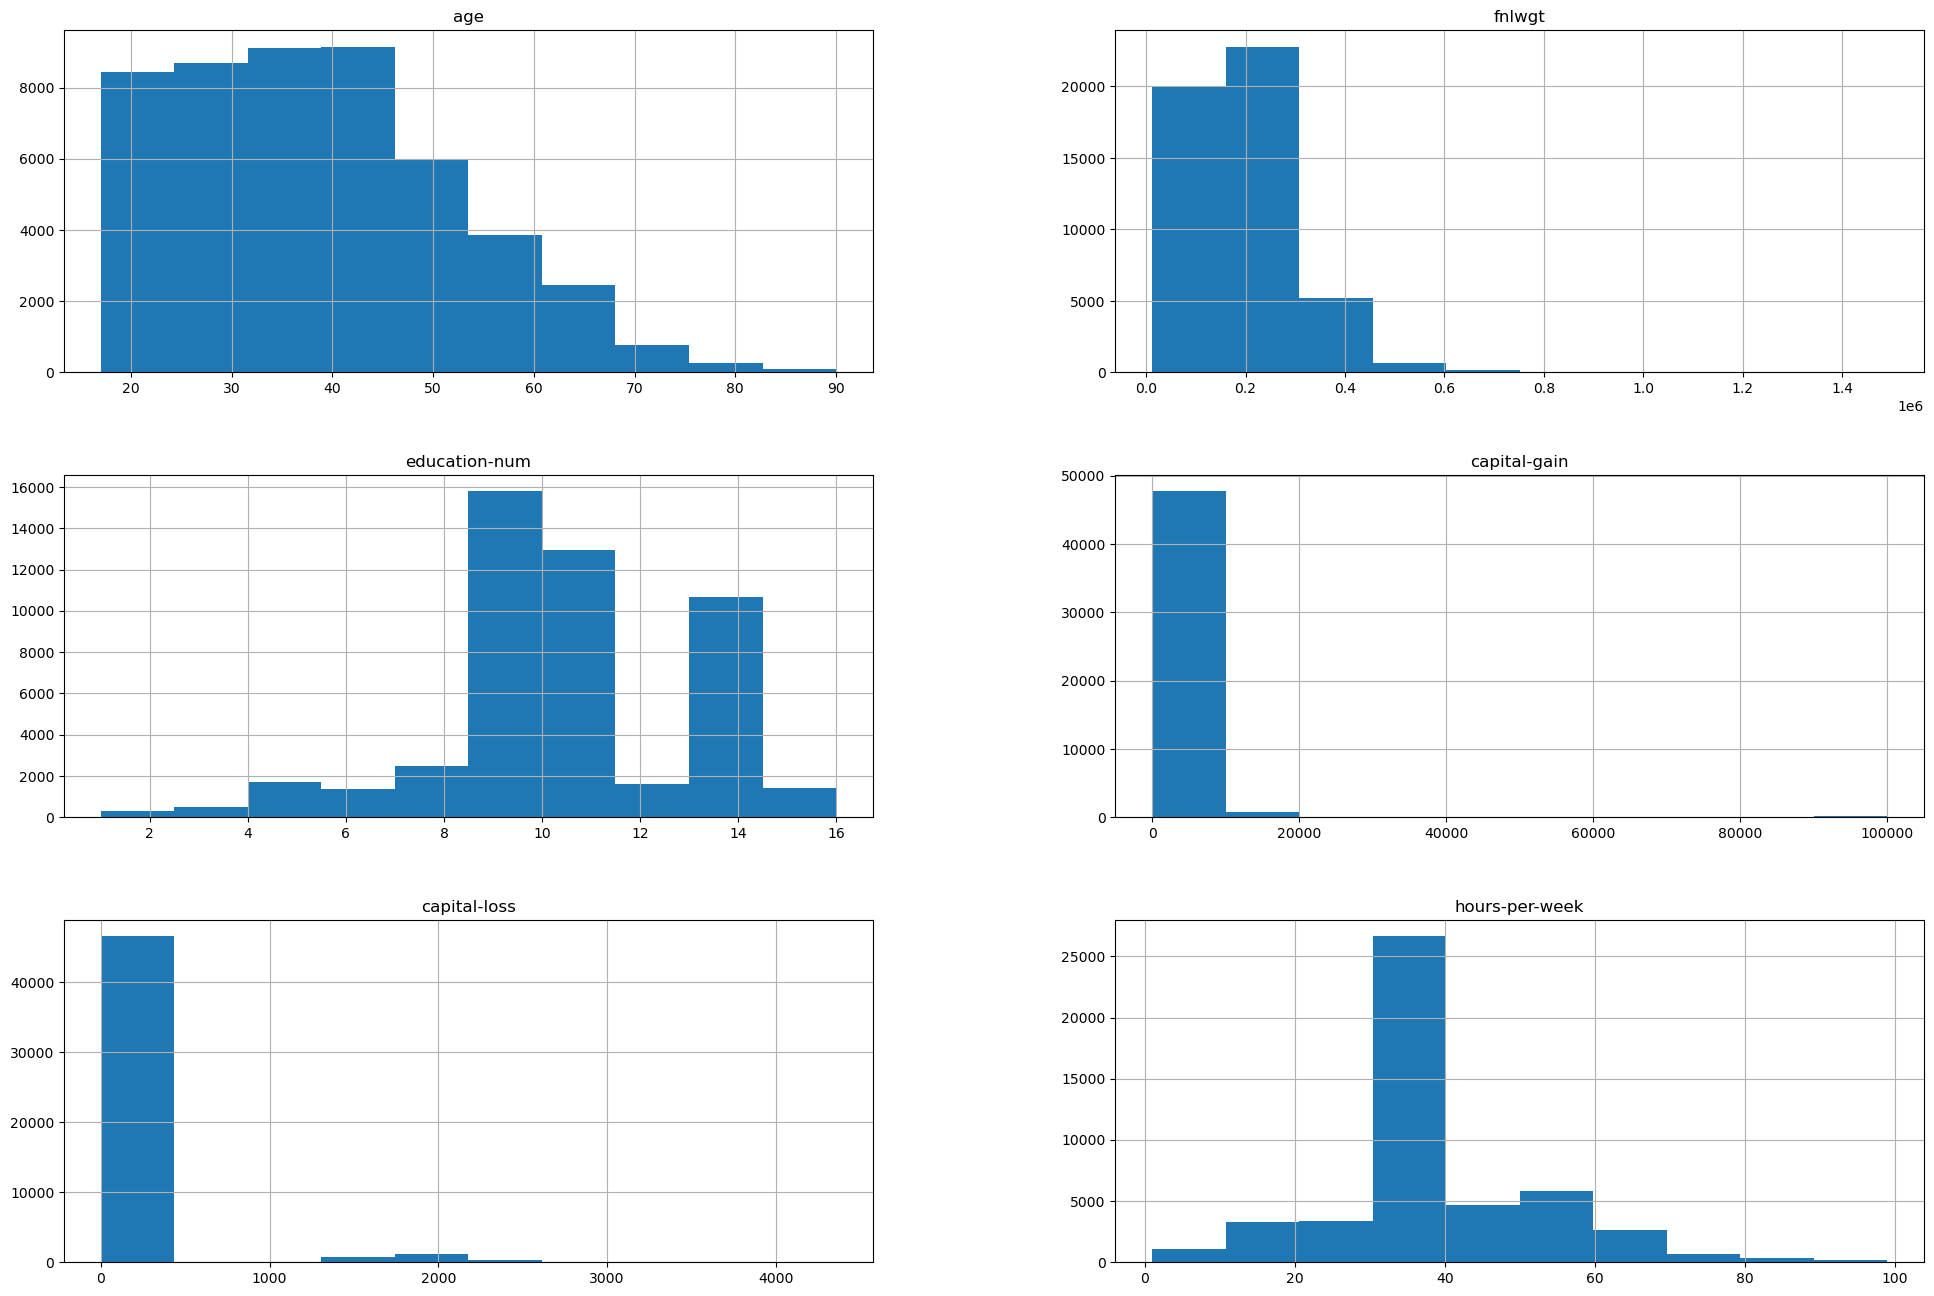

In [117]:
# Drawing a histogram for the adult dataset
X.hist(figsize=(24, 16))
plt.show() 

## Task 3: Finding the number of missing values in the dataset



Checked if our dataset contains any missing values. Found all the values in the row that equal to "?" as specified by the assignment. Then called the sum() function to fund out the total number of missing values

In [118]:
# Calculating all the instances in our dataset where the missing value is '?'
X_missing_values = (X == '?').sum()
X_missing_values

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

## Task 4: Finding the number of missing values in the dataset



Replaced all the missing values in the workclass, occupation and native-country row with null values

In [119]:
# Replacing all the '?' instances with null
X = X.replace('?', np.nan)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


## Task 5: Applying the preprocessing pipeline to our dataset

Imported the necessary libraries from scikit-learn to create the preprocessing pipeliines

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

This code separates numerical and categorical columns in DataFrame X, 
creating preprocessing pipelines to handle missing values and encode categorical data. 
The ColumnTransformer combines these pipelines, creating accurate data for machine learning models

In [121]:
# Create the cat and num columns
# Get a list of column names from the 'X' DataFrame that are of numerical data types.
# Get a list of column names from the 'y' DataFrame that are not of numerical data types.
num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()


# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

X_prepared = preprocessing.fit_transform(X)

#### Displaying our pipeline

In [122]:
preprocessing #printing out the pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

#### Displaying the shape of our newly transformed X dataset that has been processed through the pipeline

In [123]:
print(X_prepared.shape) # Showing the shape of the new prepared dataset

(48842, 105)


## Task 6: Running value counts on our target

It counts the occurrences of unique values in the 'income' column, especially  the ones with a period '.' in the data.

In [124]:
y['income'].value_counts() # Counting the values that have period after them

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

## Task 7: Cleaning our target dataset 

Cleaned the target variable and made sure the data for the preprocessing is consistent to ensure that all values are represented uniformly and accurately

In [125]:
# Fixing the income column so that the data is consistent and has no periods
y.loc[:, 'income'] = y['income'].str.replace('.', '')
y['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

## Task 8: Splitting our data into a training and testing set

Split the preprocessed data (X_prepared) and corresponding labels (y) into training and testing sets

In [126]:
# Using the newly created preprocessed data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 105) (39073, 1) (9769, 105) (9769, 1)


## Task 9: Training an svm model

In [127]:
# Setting up the svm model to predict the adult income
from sklearn.svm import SVC

model_svm = SVC(kernel='poly', C=0.1, gamma=1)
model_svm.fit(X_train[:10000], y_train[:10000].values.ravel())

SVC(C=0.1, gamma=1, kernel='poly')

### Task 9.1: Testing our trained model

This task used a trained SVM model (model_svm) to predict labels for the test data (X_test) and generated a classification report

In [128]:
# Predicts the X testing set and classifies the data into a printable format
from sklearn.metrics import classification_report

y_pred = model_svm.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7414
        >50K       0.63      0.58      0.60      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



### Task 9.2: Displaying the confusion matrix

Created a confusion matrix by comparing the labels (y_test) with predicted labels and displayed it using a visual plot

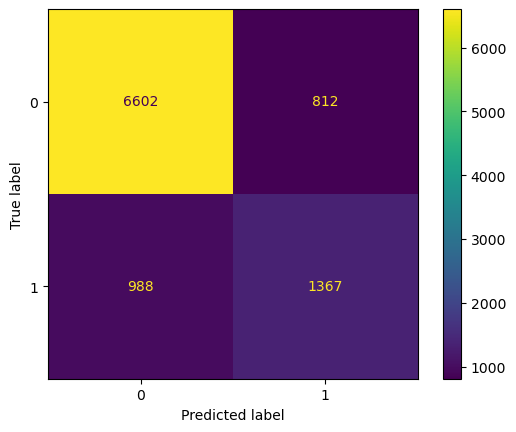

In [129]:
# Creates a confusion matrix using the y test set and the prediction of it and displays it
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
display_confusion_matrix.plot()

## Task 10: Using Grid Search to find the best values

### Task 10.1: Splitting the dataset into a training, validation, testing

Split the dataset into a 60% training set, a 20% validation set, and a 20% testing set, and displayed the shape of them

In [130]:
# Splits the dataset into a 60% training set, 20% validation set and a 20% testing set
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4,random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5,random_state=42)
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


### Task 10.2: Conducting the GridSearch using hyperparameters to find the best values

Employed Grid Search to tune an SVM model's hyperparameters, and printed the accuracy score of the optimized SVM model on the validation set.

In [131]:
# code author luisguiserrano
# Using the svm model and the grid search using the hyperparameter to print out the score of the winning svm model

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1, 10],
                  'gamma': [0.01, 1, 10]
                 }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(X_train[:10000], y_train[:10000].values.ravel())

svm_winner = svm_gs.best_estimator_
svm_winner.score (X_validation, y_validation)

0.8472563472563472

In [132]:
svm_winner #Displaying the svm winner parameter

SVC(C=10, gamma=0.01)